In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
%matplotlib inline

In [2]:
# read csv file

Data = pd.read_csv('marketing_data_working_data.csv')
Data.head()
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [3]:
# Fixing the income column

new_income_income = []
new_list = []
a = pd.DataFrame(Data[' Income '].isna().values,columns = ['Incomena']) # creating a new dataframe "a" that contains boolean columns "Incomena" indicating whether the values in the "Income" column are missing or not.
for i in Data[' Income '].copy().dropna():
    split_income = int(i.split('$')[1].split(' ')[0].split('.')[0].replace(",", ""))
    new_income_income.append(split_income)
Data[' Income '] = Data[' Income '].fillna(int(np.mean(new_income_income)))
for i in Data[' Income ']:
    if i == int(np.mean(new_income_income)):
        new_list.append(i*1000)
        pass
    else:
        split_income = int(i.split('$')[1].split(' ')[0].split('.')[0].replace(",", ""))
        new_list.append(split_income*1000)
Data = pd.concat([Data.drop(columns = [' Income ','ID']), 
    pd.DataFrame(new_list,columns = ['Income']), a], axis = 1) # the "Income" and "ID" columns dropped, the "new_list" list converted to a DataFrame with a column named "Income", and the "a" DataFrame, along the columns axis.
Data.head()

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,Incomena
0,1970,Graduation,Divorced,0,0,6/16/14,0,189,104,379,...,0,0,0,0,0,1,0,SP,84835000,False
1,1961,Graduation,Single,0,0,6/15/14,0,464,5,64,...,0,0,0,0,1,1,0,CA,57091000,False
2,1958,Graduation,Married,0,1,5/13/14,0,134,11,59,...,0,0,0,0,0,0,0,US,67267000,False
3,1967,Graduation,Together,1,1,5/11/14,0,10,0,1,...,0,0,0,0,0,0,0,AUS,32474000,False
4,1989,Graduation,Single,1,0,4/8/14,0,6,16,24,...,1,0,0,0,0,1,0,SP,21474000,False


In [4]:
# Spliting Dt_Customer columns to "Day", "Month", and "Year".

day = []
month = []
year = []
for j in Data['Dt_Customer']:
    j = j.split('/')
    day.append(int(j[1]))
    month.append(int(j[0]))
    year.append(int(j[2]))
Data = pd.concat([Data.drop(columns = ['Dt_Customer']), 
    pd.DataFrame(day, columns = ['Day']), 
    pd.DataFrame(month, columns = ['Month']), 
    pd.DataFrame(year, columns = ['Year'])], axis = 1)
Data.head()

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,Incomena,Day,Month,Year
0,1970,Graduation,Divorced,0,0,0,189,104,379,111,...,0,0,1,0,SP,84835000,False,16,6,14
1,1961,Graduation,Single,0,0,0,464,5,64,7,...,0,1,1,0,CA,57091000,False,15,6,14
2,1958,Graduation,Married,0,1,0,134,11,59,15,...,0,0,0,0,US,67267000,False,13,5,14
3,1967,Graduation,Together,1,1,0,10,0,1,0,...,0,0,0,0,AUS,32474000,False,11,5,14
4,1989,Graduation,Single,1,0,0,6,16,24,11,...,0,0,1,0,SP,21474000,False,8,4,14


In [5]:
# How many unique values are in Columns of Data ?
for i in Data.columns:
    print(F'{i}:',len(Data[i].unique()))

Year_Birth: 59
Education: 5
Marital_Status: 8
Kidhome: 3
Teenhome: 3
Recency: 100
MntWines: 776
MntFruits: 158
MntMeatProducts: 558
MntFishProducts: 182
MntSweetProducts: 177
MntGoldProds: 213
NumDealsPurchases: 15
NumWebPurchases: 15
NumCatalogPurchases: 14
NumStorePurchases: 14
NumWebVisitsMonth: 16
AcceptedCmp3: 2
AcceptedCmp4: 2
AcceptedCmp5: 2
AcceptedCmp1: 2
AcceptedCmp2: 2
Response: 2
Complain: 2
Country: 8
Income: 1975
Incomena: 2
Day: 31
Month: 12
Year: 3


## Correleation Matrix

C:\Users\9ayus\AppData\Local\Temp\ipykernel_4080\2473482717.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Data.corr(),annot=True)


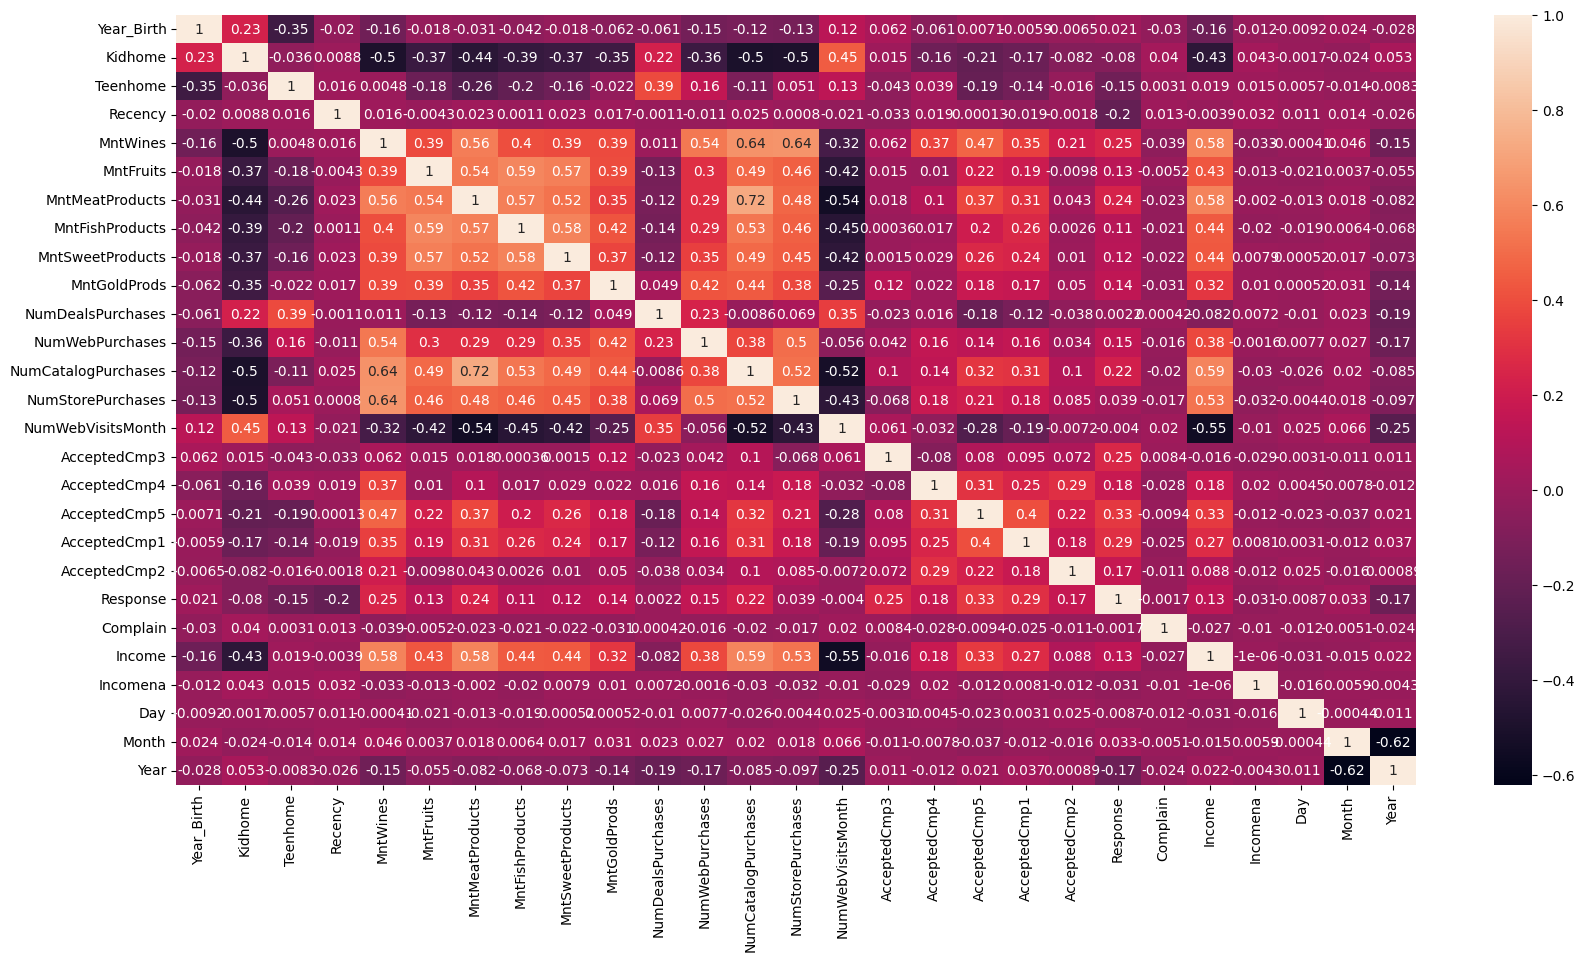

In [6]:
# Correleation Matrix for entire dataset
plt.figure(figsize=(20,10))
sns.heatmap(Data.corr(),annot=True)
plt.show()

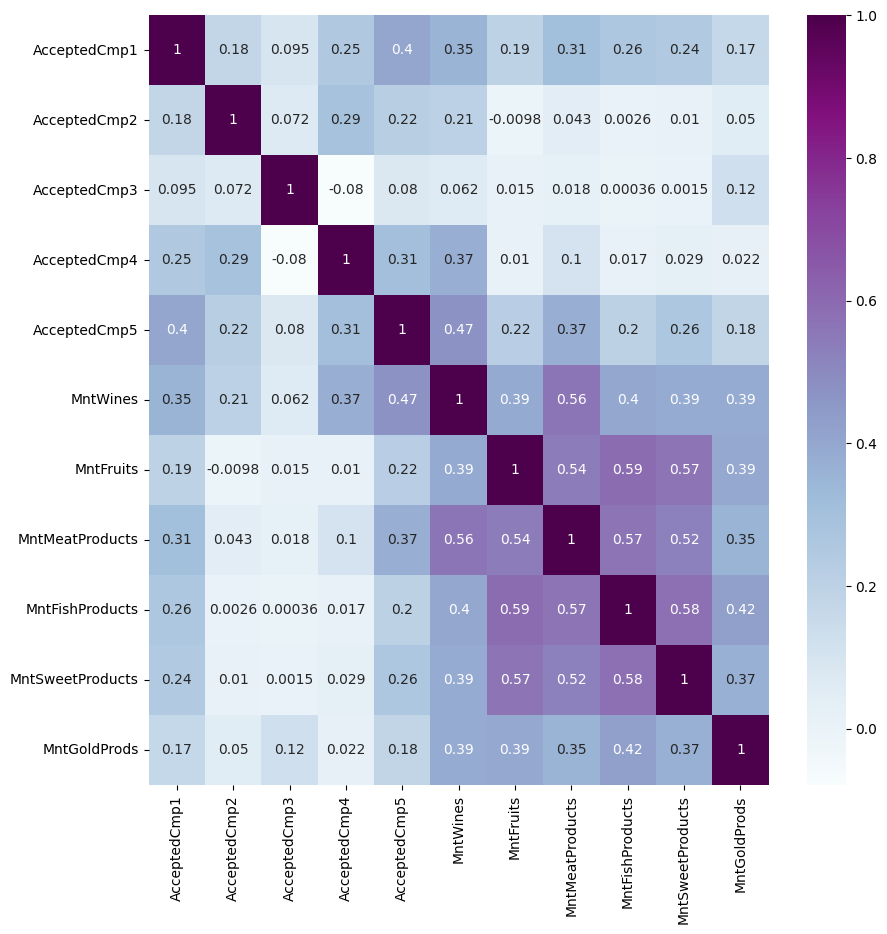

In [7]:
# Correlation matrix for "Campaign" and "Prducts"

columns_to_keep = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
cmp_p = Data[columns_to_keep]
plt.figure(figsize=(10,10))
sns.heatmap(cmp_p.corr(),annot=True, cmap = "BuPu")
plt.show()

In [8]:
# Correlation Matrix for "Campaign" and "Products"

# sns.pairplot(cmp_p, kind='reg', diag_kind = 'kde', plot_kws = {'line_kws':{'color':'red'}})
# plt.show()

In [9]:
# Correlation Matrix for "Campaign" and "Products"

# sns.pairplot(cmp_p, diag_kind = 'kde', diag_kws={'color':'red'})
# plt.show()

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year_Birth           2240 non-null   int64 
 1   Education            2240 non-null   object
 2   Marital_Status       2240 non-null   object
 3   Kidhome              2240 non-null   int64 
 4   Teenhome             2240 non-null   int64 
 5   Recency              2240 non-null   int64 
 6   MntWines             2240 non-null   int64 
 7   MntFruits            2240 non-null   int64 
 8   MntMeatProducts      2240 non-null   int64 
 9   MntFishProducts      2240 non-null   int64 
 10  MntSweetProducts     2240 non-null   int64 
 11  MntGoldProds         2240 non-null   int64 
 12  NumDealsPurchases    2240 non-null   int64 
 13  NumWebPurchases      2240 non-null   int64 
 14  NumCatalogPurchases  2240 non-null   int64 
 15  NumStorePurchases    2240 non-null   int64 
 16  NumWeb

In [11]:
Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1.968806e+03,1.198407e+01,1893.0,1959.00,1970.0,1977.00,1996.0
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,4.910938e+01,2.896245e+01,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,3.039357e+02,3.365974e+02,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,2.630223e+01,3.977343e+01,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,1.669500e+02,2.257154e+02,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,3.752545e+01,5.462898e+01,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,2.706295e+01,4.128050e+01,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,4.402188e+01,5.216744e+01,0.0,9.00,24.0,56.00,362.0


C:\Users\9ayus\AppData\Local\Temp\ipykernel_4080\1837625341.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize = (10, 5))


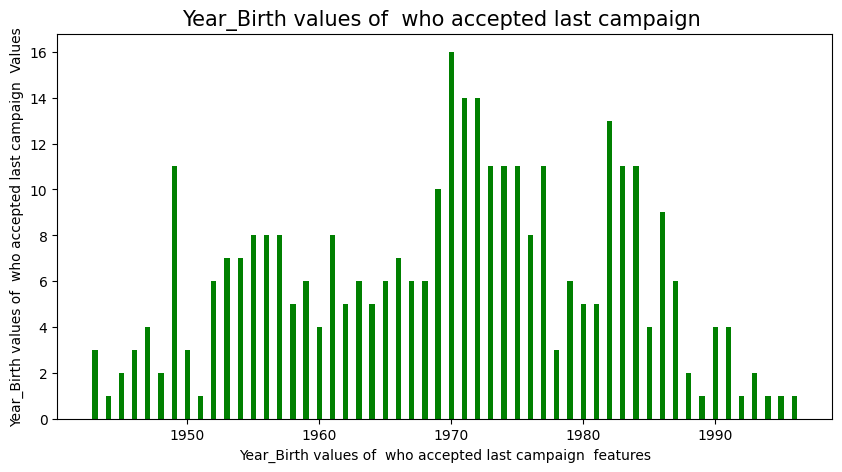

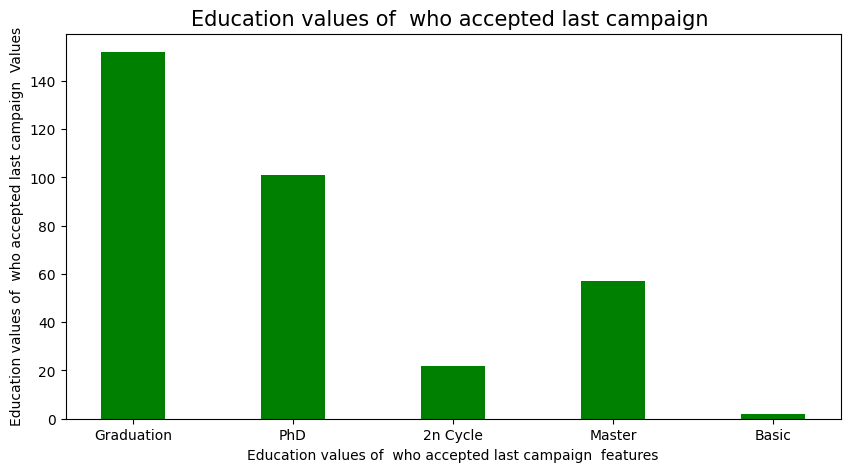

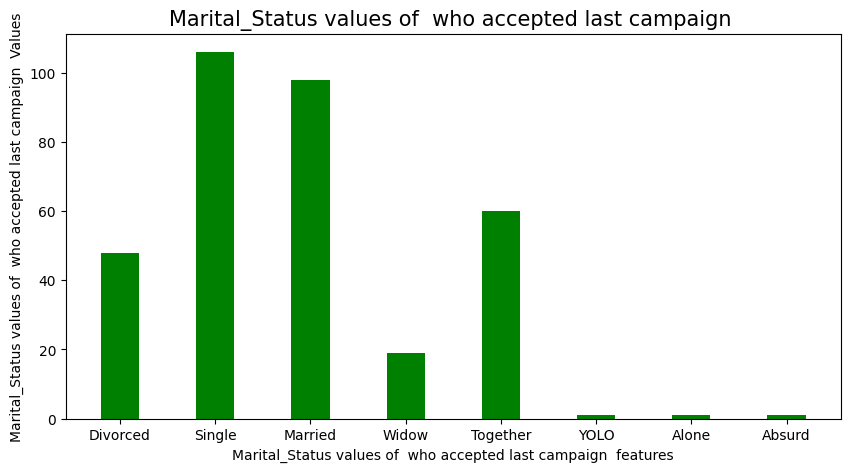

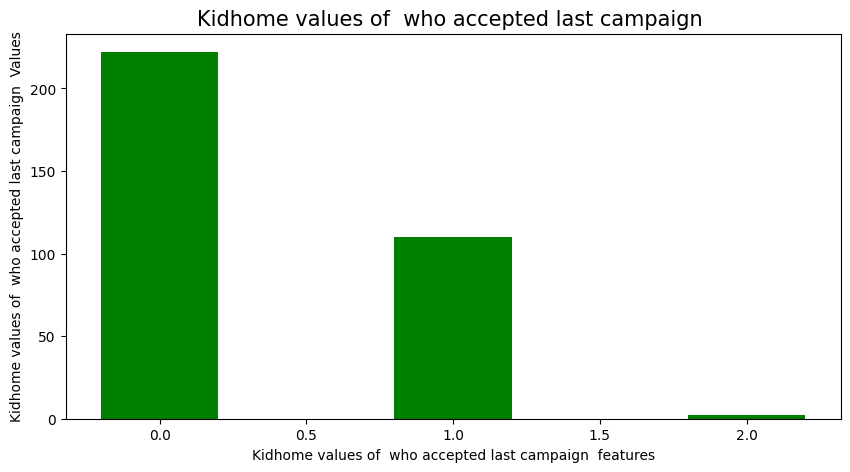

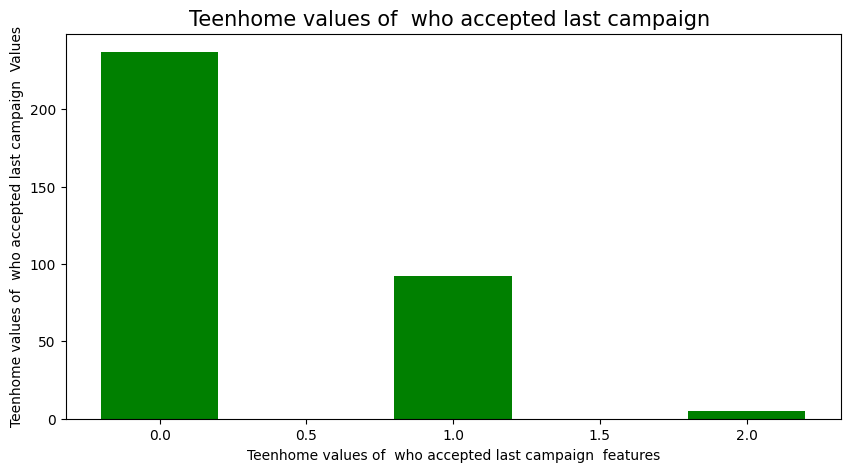

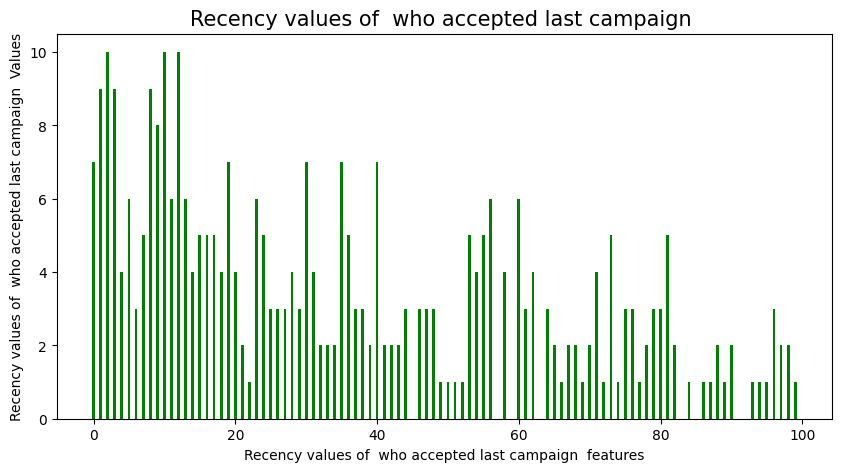

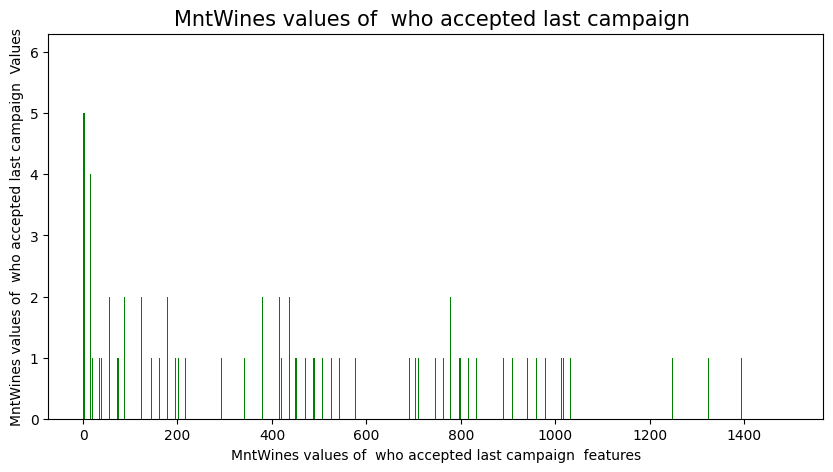

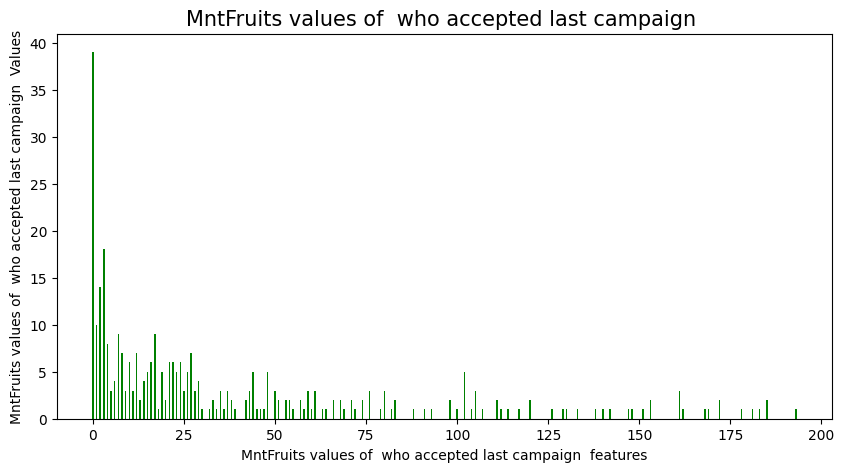

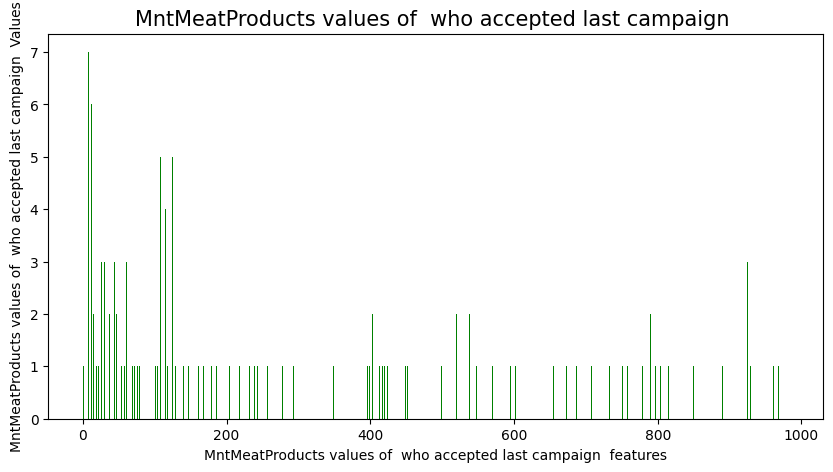

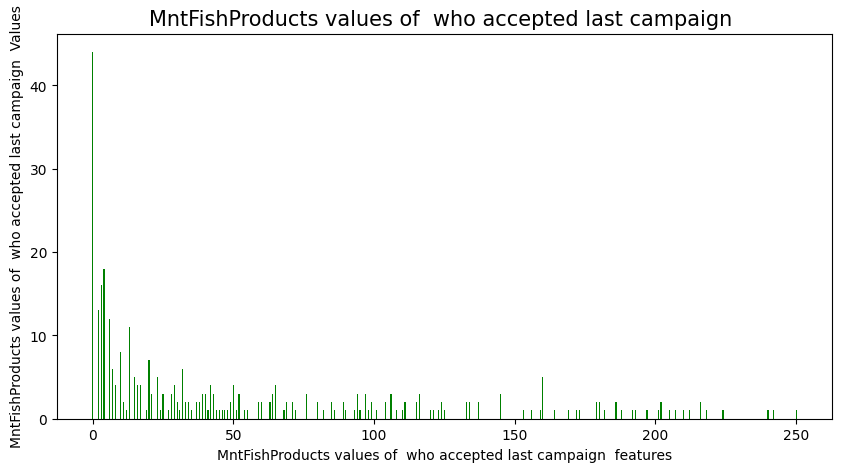

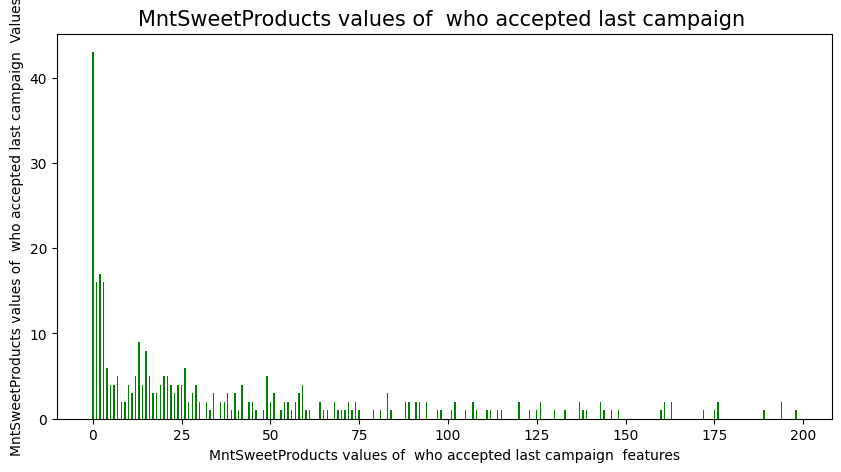

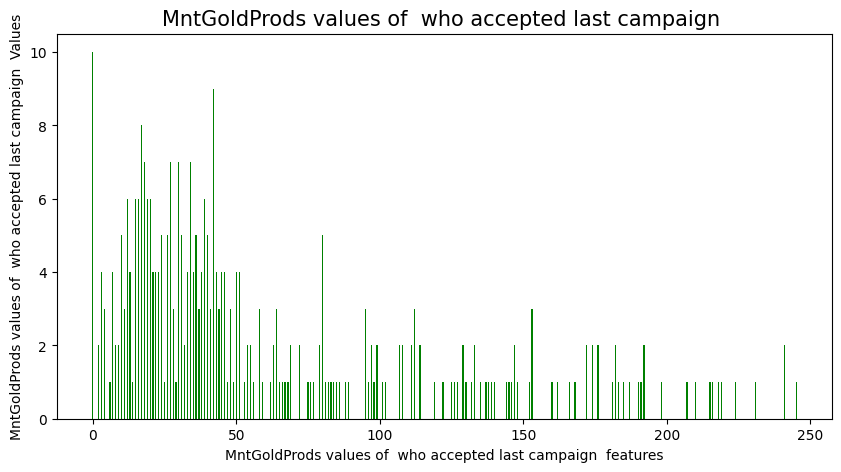

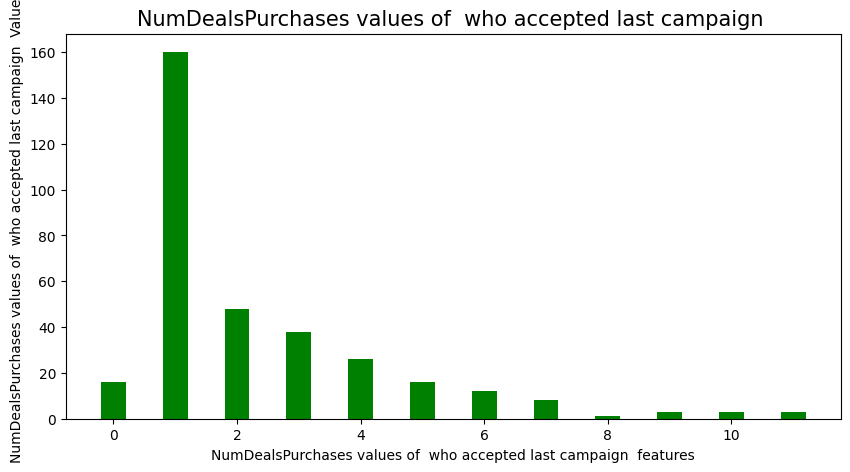

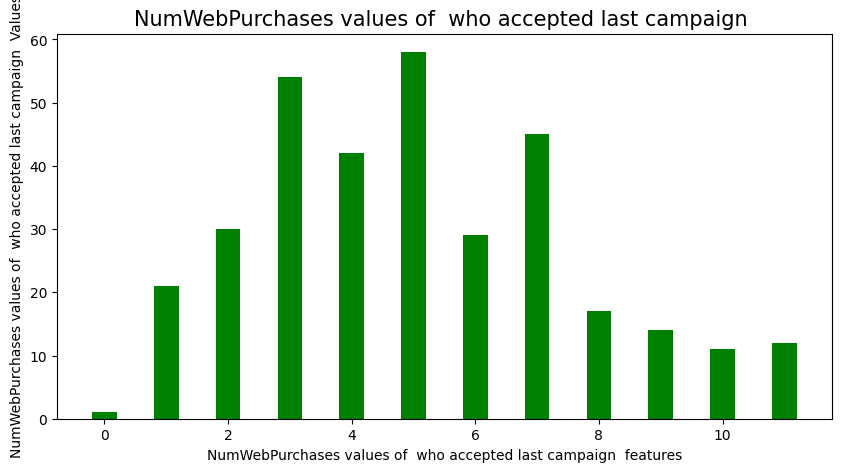

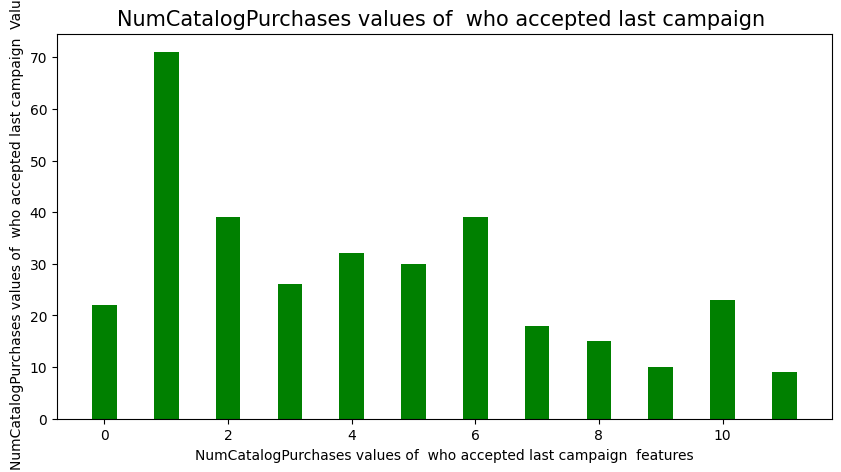

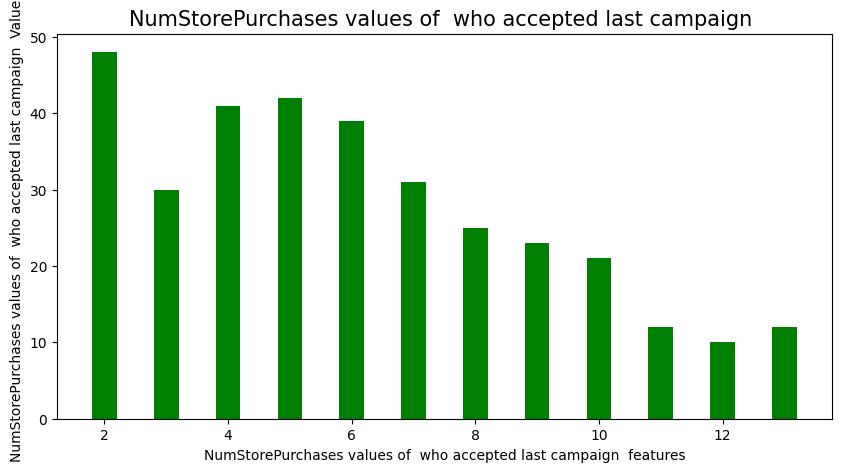

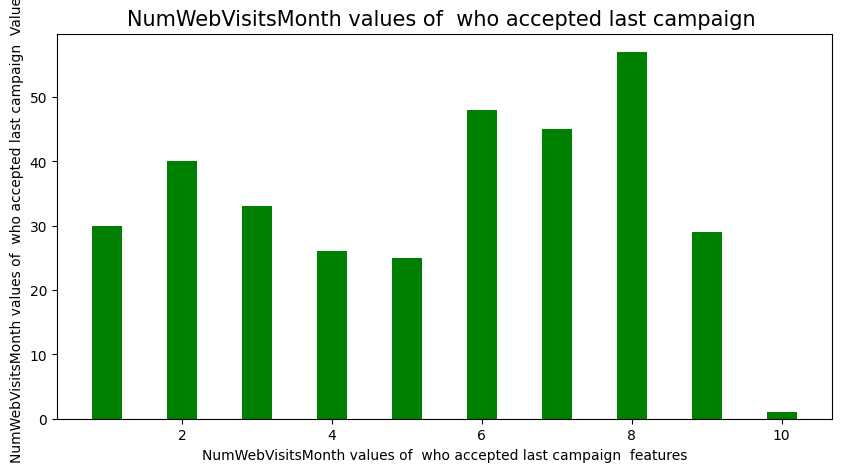

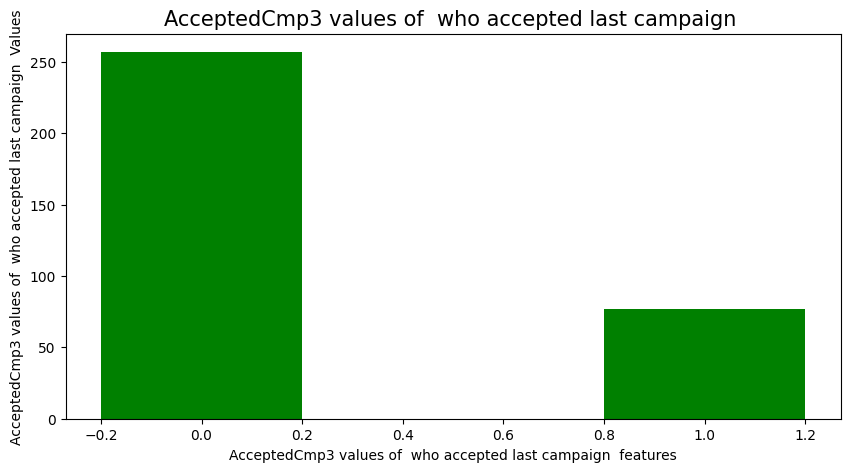

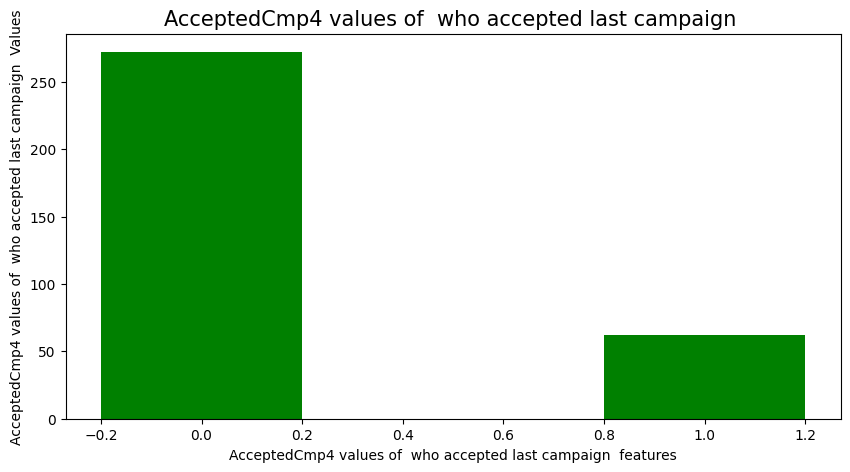

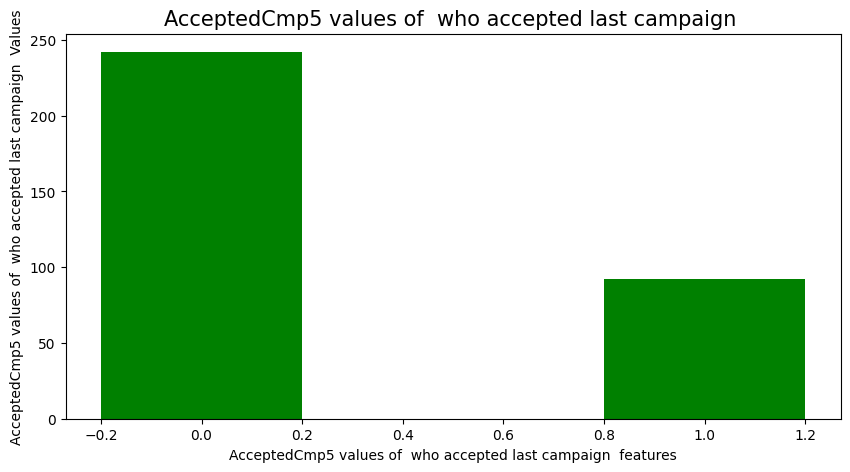

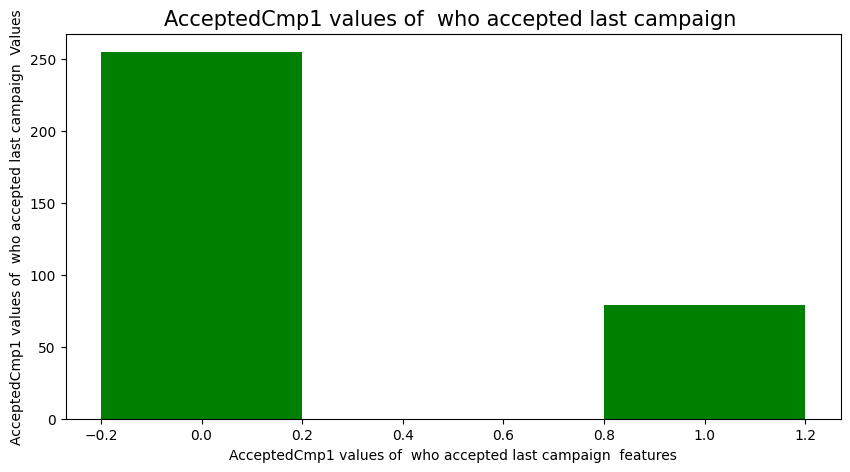

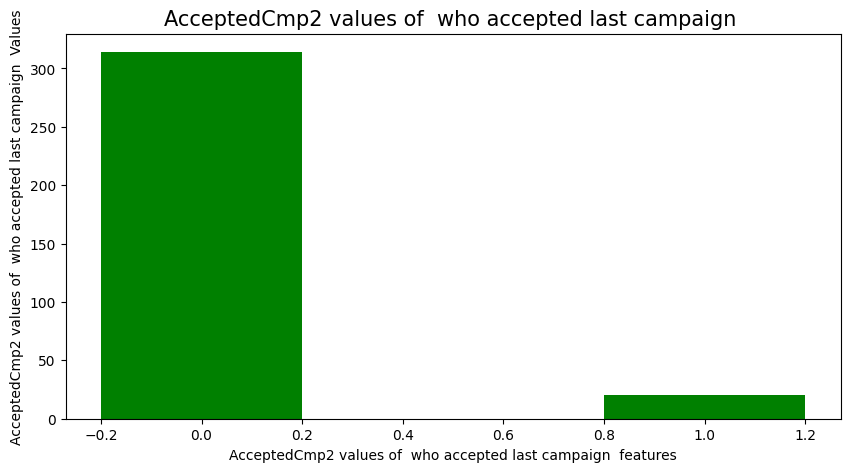

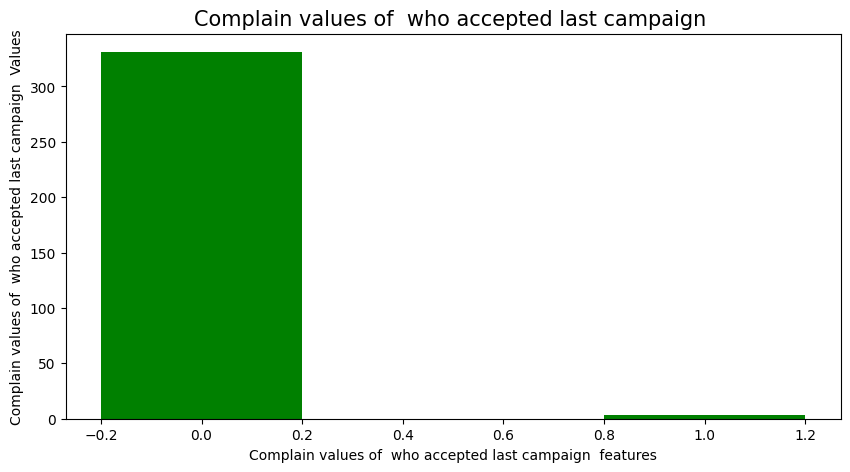

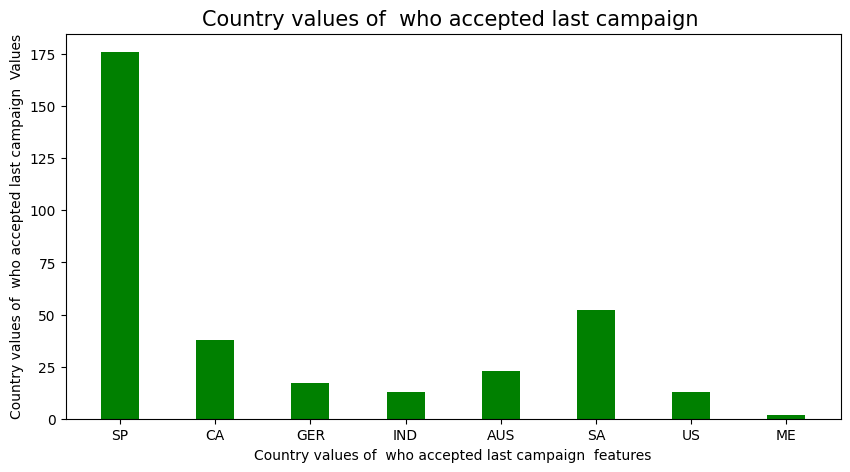

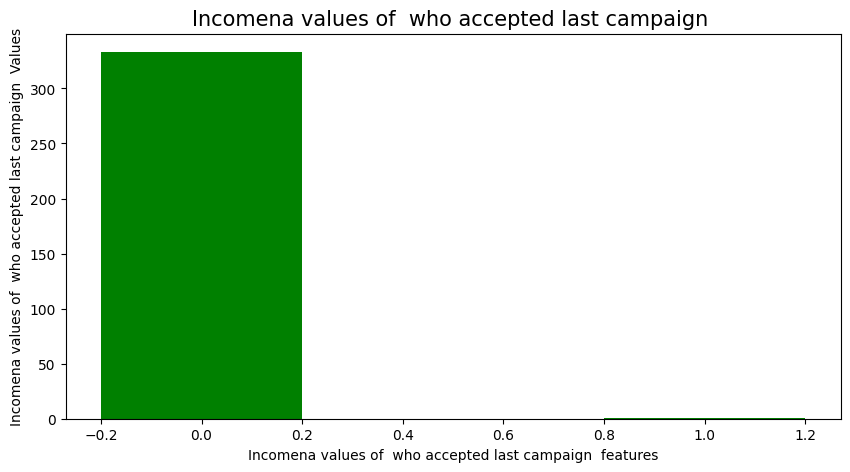

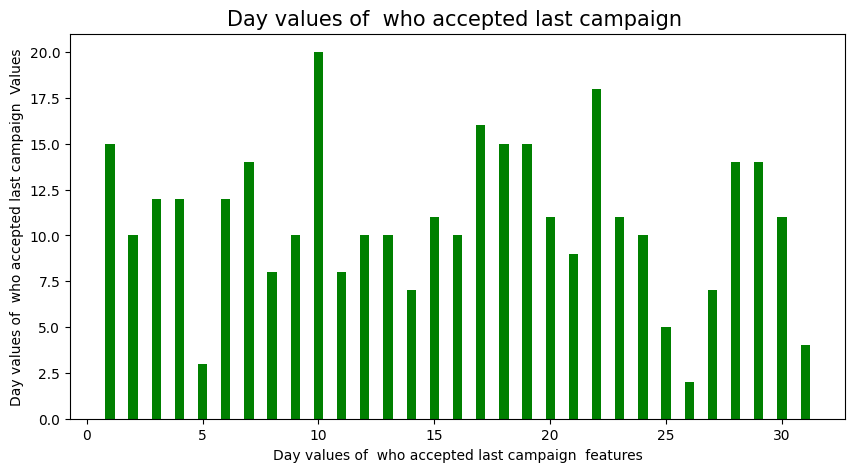

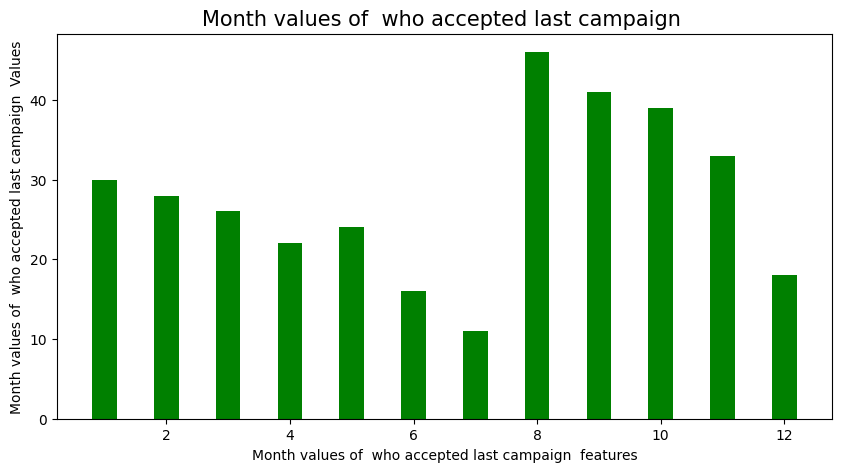

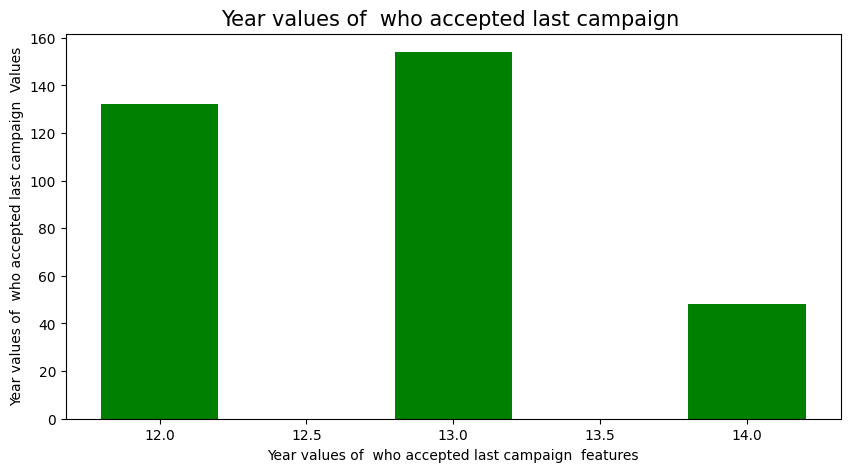

In [12]:
# Excluding "Response" and "Income" ploting the data of values who accpeted the last campaign

for _ in Data.columns:
    if _=='Response'or _=='Income':
        pass
    else:
        fig = plt.figure(figsize = (10, 5))
        uniqe_list=[i for i in Data[Data['Response']==1][f'{_}'].unique()]
        uniqe_values=[len(Data[Data['Response']==1][f'{_}'][Data[Data['Response']==1][f'{_}']==i]) for i in Data[Data['Response']==1][f'{_}'].unique()]
        plt.bar(uniqe_list, uniqe_values, color ='green',width = 0.4)
        plt.xlabel(f"{_} values of  who accepted last campaign  features",fontsize=10)
        plt.ylabel(f"{_} values of  who accepted last campaign  Values",fontsize=10)
        plt.title(f"{_} values of  who accepted last campaign ",fontsize=15)

In [13]:
# Removing extra zeros from the "Income" Column

Data['Income'] = Data['Income'].astype(str) # convert the Income column to string type
Data['Income'] = Data['Income'].str[:-3] # remove last 3 trailing zeroes
Data['Income'] = Data['Income'].astype('int64') # rolling back data type to int64
Data

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,Incomena,Day,Month,Year
0,1970,Graduation,Divorced,0,0,0,189,104,379,111,...,0,0,1,0,SP,84835,False,16,6,14
1,1961,Graduation,Single,0,0,0,464,5,64,7,...,0,1,1,0,CA,57091,False,15,6,14
2,1958,Graduation,Married,0,1,0,134,11,59,15,...,0,0,0,0,US,67267,False,13,5,14
3,1967,Graduation,Together,1,1,0,10,0,1,0,...,0,0,0,0,AUS,32474,False,11,5,14
4,1989,Graduation,Single,1,0,0,6,16,24,11,...,0,0,1,0,SP,21474,False,8,4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,0,1,99,372,18,126,47,...,0,0,0,0,US,66476,False,7,3,13
2236,1977,2n Cycle,Married,1,0,99,5,10,13,3,...,0,0,0,0,SP,31056,False,22,1,13
2237,1976,Graduation,Divorced,1,0,99,185,2,88,15,...,0,0,0,0,SP,46310,False,3,12,12
2238,1978,Graduation,Married,0,0,99,267,38,701,149,...,0,0,0,0,IND,65819,False,29,11,12


In [14]:
# creating a new column in the Dataframe that sums up all columns with 'Mnt' in their name along the rows.

mnt_cols = [col for col in Data.columns if 'Mnt' in col]
Data['TotalMnt'] = Data[mnt_cols].sum(axis=1)
Data

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Response,Complain,Country,Income,Incomena,Day,Month,Year,TotalMnt
0,1970,Graduation,Divorced,0,0,0,189,104,379,111,...,0,1,0,SP,84835,False,16,6,14,1190
1,1961,Graduation,Single,0,0,0,464,5,64,7,...,1,1,0,CA,57091,False,15,6,14,577
2,1958,Graduation,Married,0,1,0,134,11,59,15,...,0,0,0,US,67267,False,13,5,14,251
3,1967,Graduation,Together,1,1,0,10,0,1,0,...,0,0,0,AUS,32474,False,11,5,14,11
4,1989,Graduation,Single,1,0,0,6,16,24,11,...,0,1,0,SP,21474,False,8,4,14,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,0,1,99,372,18,126,47,...,0,0,0,US,66476,False,7,3,13,689
2236,1977,2n Cycle,Married,1,0,99,5,10,13,3,...,0,0,0,SP,31056,False,22,1,13,55
2237,1976,Graduation,Divorced,1,0,99,185,2,88,15,...,0,0,0,SP,46310,False,3,12,12,309
2238,1978,Graduation,Married,0,0,99,267,38,701,149,...,0,0,0,IND,65819,False,29,11,12,1383


In [15]:
# sns.distplot(Data['NumStorePurchases'], bins=12)
# plt.title('Number of Store Purchases distribution', size=16)
# plt.ylabel('count')
# plt.show()

## Income and Response Relationship

In [16]:
# Creating Income Bucket

income_bucket = [0, 21000, 41000, 61000, 81000, 101000, float('inf')]
category_label = [10000, 20000, 40000, 60000, 80000, 100000]

Data['income_category'] = pd.cut(Data['Income'], income_bucket, labels = category_label)
Data

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Response,Complain,Country,Income,Incomena,Day,Month,Year,TotalMnt,income_category
0,1970,Graduation,Divorced,0,0,0,189,104,379,111,...,1,0,SP,84835,False,16,6,14,1190,80000
1,1961,Graduation,Single,0,0,0,464,5,64,7,...,1,0,CA,57091,False,15,6,14,577,40000
2,1958,Graduation,Married,0,1,0,134,11,59,15,...,0,0,US,67267,False,13,5,14,251,60000
3,1967,Graduation,Together,1,1,0,10,0,1,0,...,0,0,AUS,32474,False,11,5,14,11,20000
4,1989,Graduation,Single,1,0,0,6,16,24,11,...,1,0,SP,21474,False,8,4,14,91,20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,0,1,99,372,18,126,47,...,0,0,US,66476,False,7,3,13,689,60000
2236,1977,2n Cycle,Married,1,0,99,5,10,13,3,...,0,0,SP,31056,False,22,1,13,55,20000
2237,1976,Graduation,Divorced,1,0,99,185,2,88,15,...,0,0,SP,46310,False,3,12,12,309,40000
2238,1978,Graduation,Married,0,0,99,267,38,701,149,...,0,0,IND,65819,False,29,11,12,1383,60000


In [17]:
# creating variable to store "income_category" and "Response"

in_r = ['income_category', 'Response']
income_response = Data[in_r]
income_response

,income_category,Response
0,80000,1
1,40000,1
2,60000,0
3,20000,0
4,20000,1
...,...,...
2235,60000,0
2236,20000,0
2237,40000,0
2238,60000,0


In [18]:
# keeping only the values where 'Response' == 1 in new variable response_1

response_1 = income_response[income_response['Response'] == 1]
# response_1

In [19]:
# sns.distplot(response_1['income_category'], bins=8)
# plt.title('Income and Response Relation', size=16)
# plt.show()

In [20]:
# sum all the response and group by 'income_category'

grouped_income_respose = response_1.groupby('income_category')['Response'].sum().reset_index()
grouped_income_respose

,income_category,Response
0,10000,14
1,20000,73
2,40000,71
3,60000,95
4,80000,77
5,100000,4


In [21]:
grouped_income_respose.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Response,6.0,55.666667,37.264818,4.0,28.25,72.0,76.0,95.0


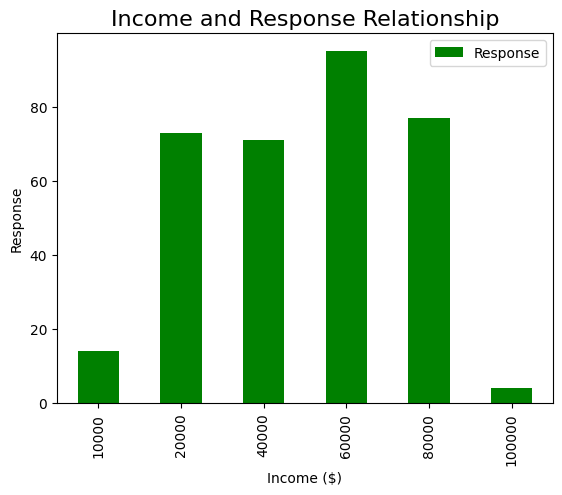

In [22]:
# ploting the graph of Income and Resposne Relationship
grouped_income_respose.plot(x='income_category',y='Response',kind='bar', color='green')
plt.title('Income and Response Relationship', size=16)
plt.xlabel('Income ($)')
plt.ylabel('Response')
plt.show()

In [23]:
# sns.distplot(grouped_income_respose['income_category'], bins=8)
# plt.title('Income and Response Relationship', size=16)
# plt.xlabel('Income')
# plt.ylabel('Response')
# plt.show()

In [24]:
# creating variable to store "income_category" and "Campaign"

in_c = ['income_category', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
income_campaign = Data[in_c]
income_campaign

,income_category,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,80000,0,0,0,0,0
1,40000,0,1,0,0,0
2,60000,0,0,0,0,0
3,20000,0,0,0,0,0
4,20000,0,0,1,0,0
...,...,...,...,...,...,...
2235,60000,0,0,0,0,0
2236,20000,0,0,0,0,0
2237,40000,0,0,0,0,0
2238,60000,0,0,0,0,0


In [25]:
# creating a new column in the Dataframe that sums up all columns with 'Accepted' in their name along the rows.

accepted_cols = [col for col in income_campaign.columns if 'Accepted' in col]
income_campaign['Total_Accepted_Campaign'] = income_campaign[accepted_cols].sum(axis=1)
income_campaign

C:\Users\9ayus\AppData\Local\Temp\ipykernel_4080\3316111276.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_campaign['Total_Accepted_Campaign'] = income_campaign[accepted_cols].sum(axis=1)


,income_category,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Total_Accepted_Campaign
0,80000,0,0,0,0,0,0
1,40000,0,1,0,0,0,1
2,60000,0,0,0,0,0,0
3,20000,0,0,0,0,0,0
4,20000,0,0,1,0,0,1
...,...,...,...,...,...,...,...
2235,60000,0,0,0,0,0,0
2236,20000,0,0,0,0,0,0
2237,40000,0,0,0,0,0,0
2238,60000,0,0,0,0,0,0


In [26]:
# keeping only the values where 'Total_Accepted_Campaign' != 0 in new variable response_1

accepted_camp = income_campaign[income_campaign['Total_Accepted_Campaign'] != 0]
accepted_camp

,income_category,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Total_Accepted_Campaign
1,40000,0,1,0,0,0,1
4,20000,0,0,1,0,0,1
6,60000,0,0,1,0,0,1
33,40000,1,0,0,1,0,2
35,80000,1,0,0,0,1,2
...,...,...,...,...,...,...,...
2212,80000,0,0,0,0,1,1
2216,40000,0,0,0,1,0,1
2217,40000,0,0,0,1,0,1
2227,60000,1,0,0,0,0,1


In [27]:
grouped_income_campaign = accepted_camp.groupby('income_category')['Total_Accepted_Campaign'].sum().reset_index()
grouped_income_campaign

,income_category,Total_Accepted_Campaign
0,10000,13
1,20000,58
2,40000,119
3,60000,249
4,80000,216
5,100000,12


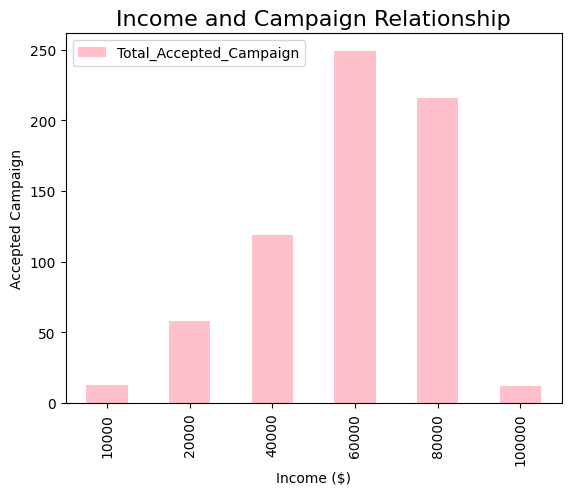

In [28]:
# ploting the graph of Income and Campaign Relationship
grouped_income_campaign.plot(x='income_category',y='Total_Accepted_Campaign',kind='bar', color='pink')
plt.title('Income and Campaign Relationship', size=16)
plt.xlabel('Income ($)')
plt.ylabel('Accepted Campaign')
plt.show()

## Income and Campaign Relation

In [29]:
# creating variable to store "income_category" and "Campaign" part 2

in_cam = ['income_category', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
inc_cam = Data[in_cam]
inc_cam

,income_category,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,80000,0,0,0,0,0
1,40000,0,1,0,0,0
2,60000,0,0,0,0,0
3,20000,0,0,0,0,0
4,20000,0,0,1,0,0
...,...,...,...,...,...,...
2235,60000,0,0,0,0,0
2236,20000,0,0,0,0,0
2237,40000,0,0,0,0,0
2238,60000,0,0,0,0,0


In [30]:
# process divided into 5 parts for each campaign
# creating variable acccmp (accepted campaign) and saving the values where 'AcceptedCamp' == 1
# Sum the 'AcceptedCmp' and grouped them by 'income_category' stored in grouped_income_camp

# Campaign 1

part1 = ['income_category', 'AcceptedCmp1']
inc_cam_part1 = Data[part1]
acpcmp_1 = inc_cam_part1[inc_cam_part1['AcceptedCmp1'] == 1]
grouped_income_camp1 = acpcmp_1.groupby('income_category')['AcceptedCmp1'].sum().reset_index()

# Campaign 2

part2 = ['income_category', 'AcceptedCmp2']
inc_cam_part2 = Data[part2]
acpcmp_2 = inc_cam_part2[inc_cam_part2['AcceptedCmp2'] == 1]
grouped_income_camp2 = acpcmp_2.groupby('income_category')['AcceptedCmp2'].sum().reset_index()

# Campaign 3

part3 = ['income_category', 'AcceptedCmp3']
inc_cam_part3 = Data[part3]
acpcmp_3 = inc_cam_part3[inc_cam_part3['AcceptedCmp3'] == 1]
grouped_income_camp3 = acpcmp_3.groupby('income_category')['AcceptedCmp3'].sum().reset_index()

# Campaign 4

part4 = ['income_category', 'AcceptedCmp4']
inc_cam_part4 = Data[part4]
acpcmp_4 = inc_cam_part4[inc_cam_part4['AcceptedCmp4'] == 1]
grouped_income_camp4 = acpcmp_4.groupby('income_category')['AcceptedCmp4'].sum().reset_index()

# Campaign 5

part5 = ['income_category', 'AcceptedCmp5']
inc_cam_part5 = Data[part5]
acpcmp_5 = inc_cam_part5[inc_cam_part5['AcceptedCmp5'] == 1]
grouped_income_camp5 = acpcmp_5.groupby('income_category')['AcceptedCmp5'].sum().reset_index()

In [31]:
# Joining all five [grouped_income_camp] DataFrames
# Identifed join keys 'income_category'
# Using Inner Join

merged_inner_1 = pd.merge(left = grouped_income_camp1, right = grouped_income_camp2,
                    left_on = 'income_category',
                    right_on = 'income_category')
merged_inner_1.shape
merged_inner_2 = pd.merge(left = merged_inner_1, right = grouped_income_camp3,
                    left_on = 'income_category',
                    right_on = 'income_category')
merged_inner_2.shape
merged_inner_3 = pd.merge(left = merged_inner_2, right = grouped_income_camp4,
                    left_on = 'income_category',
                    right_on = 'income_category')
merged_inner_3.shape
grouped_income_and_all_five_campaign = pd.merge(left = merged_inner_3, right = grouped_income_camp5,
                    left_on = 'income_category',
                    right_on = 'income_category')
grouped_income_and_all_five_campaign.shape
grouped_income_and_all_five_campaign

,income_category,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,10000,0,0,13,0,0
1,20000,1,0,53,4,0
2,40000,9,10,42,55,3
3,60000,74,8,33,68,66
4,80000,56,11,22,37,90
5,100000,4,1,0,3,4


In [32]:
grouped_income_and_all_five_campaign.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AcceptedCmp1,6.0,24.000000,32.416045,0.0,1.75,6.5,44.25,74.0
AcceptedCmp2,6.0,5.000000,5.215362,0.0,0.25,4.5,9.50,11.0
AcceptedCmp3,6.0,27.166667,19.425928,0.0,15.25,27.5,39.75,53.0
AcceptedCmp4,6.0,27.833333,29.647372,0.0,3.25,20.5,50.50,68.0
AcceptedCmp5,6.0,27.166667,40.131866,0.0,0.75,3.5,50.50,90.0


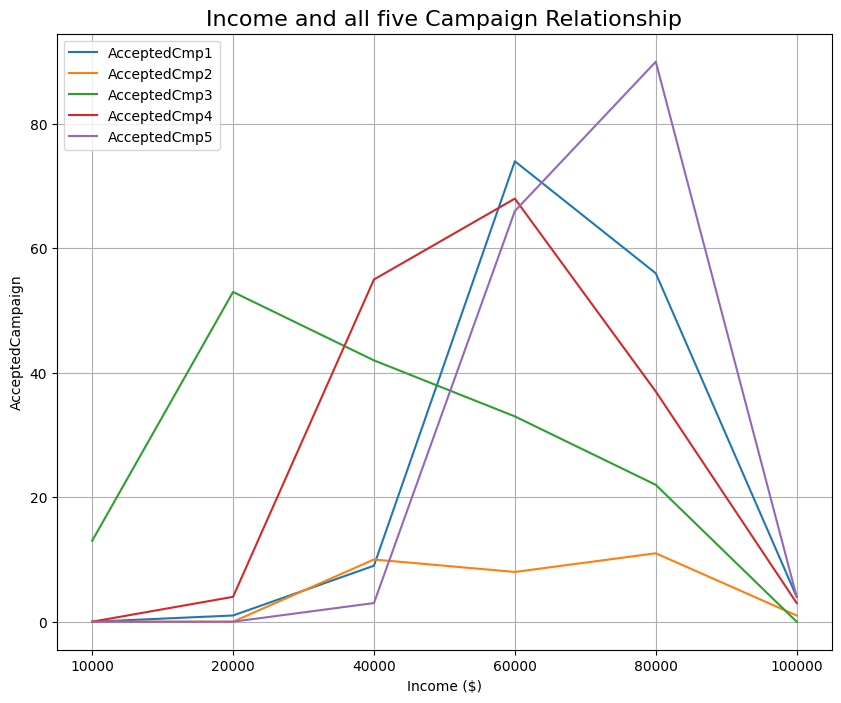

In [33]:
# ploting the graph of Income and all five Campaign Relationship

grouped_income_and_all_five_campaign.plot(x="income_category",
                                        y=["AcceptedCmp1", "AcceptedCmp2",
                                        "AcceptedCmp3", "AcceptedCmp4",
                                        "AcceptedCmp5"],
                                        grid=0.8 ,kind="line", figsize=(10, 8))
plt.title('Income and all five Campaign Relationship', size=16)
plt.xlabel('Income ($)')
plt.ylabel('AcceptedCampaign')
plt.show()

## Income and Product Relation

In [34]:
in_p = ['income_category', 'MntWines', 'MntFruits',
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds']
income_product = Data[in_p]
income_product

,income_category,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,80000,189,104,379,111,189,218
1,40000,464,5,64,7,0,37
2,60000,134,11,59,15,2,30
3,20000,10,0,1,0,0,0
4,20000,6,16,24,11,0,34
...,...,...,...,...,...,...,...
2235,60000,372,18,126,47,48,78
2236,20000,5,10,13,3,8,16
2237,40000,185,2,88,15,5,14
2238,60000,267,38,701,149,165,63


In [35]:
# Product Price Comparison Tabel
income_product.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0


In [36]:
# MntWines
 
p1 = ['income_category', 'MntWines']
product_1 = Data[p1]
grouped_income_product_1 = product_1.groupby('income_category')['MntWines'].sum().reset_index() 

# MntFruits

p2 = ['income_category', 'MntFruits']
product_2 = Data[p2]
grouped_income_product_2 = product_2.groupby('income_category')['MntFruits'].sum().reset_index() 

# MntMeatProducts

p3 = ['income_category', 'MntMeatProducts']
product_3 = Data[p3]
grouped_income_product_3 = product_3.groupby('income_category')['MntMeatProducts'].sum().reset_index() 

# MntFishProducts

p4 = ['income_category', 'MntFishProducts']
product_4 = Data[p4]
grouped_income_product_4 = product_4.groupby('income_category')['MntFishProducts'].sum().reset_index() 

# MntSweetProducts

p5 = ['income_category', 'MntSweetProducts']
product_5 = Data[p5]
grouped_income_product_5 = product_5.groupby('income_category')['MntSweetProducts'].sum().reset_index() 

# MntGoldProds

p6 = ['income_category', 'MntGoldProds']
product_6 = Data[p6]
grouped_income_product_6 = product_6.groupby('income_category')['MntGoldProds'].sum().reset_index()


In [37]:
# Joining all five [grouped_income_product] DataFrames
# Identifed join keys 'income_category'
# Using Inner Join

inner_join_1 = pd.merge(left = grouped_income_product_1, right = grouped_income_product_2,
                    left_on = 'income_category',
                    right_on = 'income_category')
inner_join_1.shape
inner_join_2 = pd.merge(left = inner_join_1, right = grouped_income_product_3,
                    left_on = 'income_category',
                    right_on = 'income_category')
inner_join_2.shape
inner_join_3 = pd.merge(left = inner_join_2, right = grouped_income_product_4,
                    left_on = 'income_category',
                    right_on = 'income_category')
inner_join_3.shape
inner_join_4 = pd.merge(left = inner_join_3, right = grouped_income_product_5,
                    left_on = 'income_category',
                    right_on = 'income_category')
inner_join_4.shape
grouped_income_and_all_product = pd.merge(left = inner_join_4, right = grouped_income_product_6,
                    left_on = 'income_category',
                    right_on = 'income_category')
grouped_income_and_all_product.shape
grouped_income_and_all_product

,income_category,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,10000,1323,800,3321,1096,805,2757
1,20000,23684,3739,16305,5801,3838,10967
2,40000,167084,9806,56105,14382,10095,27762
3,60000,360482,32684,200500,46500,32245,44088
4,80000,125363,11465,91971,15889,12925,12421
5,100000,2880,423,5766,389,713,614


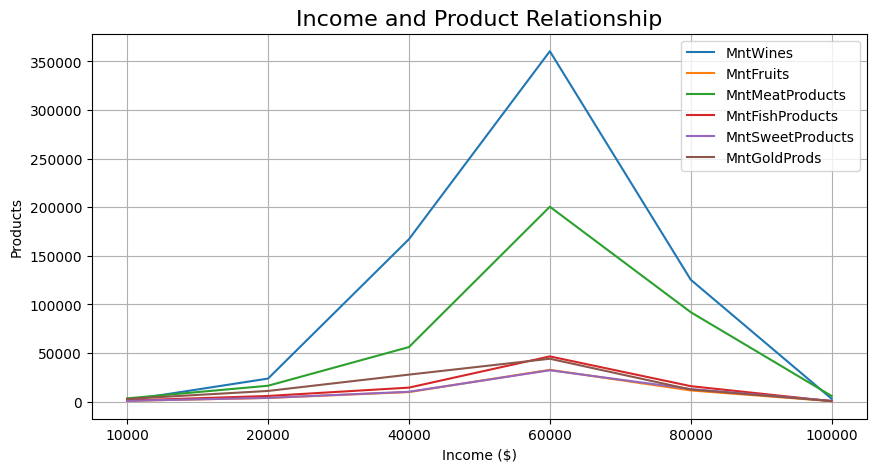

In [38]:
grouped_income_and_all_product.plot(x="income_category",
                                    y=["MntWines", "MntFruits", "MntMeatProducts", 
                                        "MntFishProducts", "MntSweetProducts", "MntGoldProds"],
                                        grid=0.8 ,kind="line", figsize=(10, 5))
plt.title('Income and Product Relationship', size=16)
plt.xlabel('Income ($)')
plt.ylabel('Products')
plt.show()

## Birth Year and Campaign Relation

In [39]:
# creating variable to store "Year_Birth" and "AcceptedCmp"

yb_cmp = ['Year_Birth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
year_birth_campaign = Data[yb_cmp]

# process divided into 5 parts for each campaign
# creating variable acccmp (accepted campaign 2) and saving the values where 'AcceptedCamp' == 1
# Sum the 'AcceptedCmp' and grouped them by 'income_category' stored in grouped_year_birth_camp
grouped_campaings = {}

for i in range(1, 6):
    ybc = ['Year_Birth', f'AcceptedCmp{i}']
    yb_cam_part1 = Data[ybc]
    yb_acpcmp_1 = yb_cam_part1[yb_cam_part1[f'AcceptedCmp{i}'] == 1]
    grouped_year_birth_camp = yb_acpcmp_1.groupby('Year_Birth')[f'AcceptedCmp{i}'].sum().reset_index()
    grouped_campaings[f'grouped_year_birth_camp{i}'] = grouped_year_birth_camp

grouped_campaings
# grouped_campaings['grouped_year_birth_camp']
# Campaign 1

# ybc1 = ['Year_Birth', 'AcceptedCmp1']
# yb_cam_part1 = Data[ybc1]
# yb_acpcmp_1 = yb_cam_part1[yb_cam_part1['AcceptedCmp1'] == 1]
# grouped_year_birth_camp1 = yb_acpcmp_1.groupby('Year_Birth')['AcceptedCmp1'].sum().reset_index()

# # Campaign 2

# ybc2 = ['Year_Birth', 'AcceptedCmp2']
# yb_cam_part2 = Data[ybc2]
# yb_acpcmp_2 = yb_cam_part2[yb_cam_part2['AcceptedCmp2'] == 1]
# grouped_year_birth_camp2 = yb_acpcmp_2.groupby('Year_Birth')['AcceptedCmp2'].sum().reset_index()

# # Campaign 3

# ybc3 = ['Year_Birth', 'AcceptedCmp3']
# yb_cam_part3 = Data[ybc3]
# yb_acpcmp_3 = yb_cam_part3[yb_cam_part3['AcceptedCmp3'] == 1]
# grouped_year_birth_camp3 = yb_acpcmp_3.groupby('Year_Birth')['AcceptedCmp3'].sum().reset_index()

# # Campaign 4

# ybc4 = ['Year_Birth', 'AcceptedCmp4']
# yb_cam_part4 = Data[ybc4]
# yb_acpcmp_4 = yb_cam_part4[yb_cam_part4['AcceptedCmp4'] == 1]
# grouped_year_birth_camp4 = yb_acpcmp_4.groupby('Year_Birth')['AcceptedCmp4'].sum().reset_index()

# # Campaign 5

# ybc5 = ['Year_Birth', 'AcceptedCmp5']
# yb_cam_part5 = Data[ybc5]
# yb_acpcmp_5 = yb_cam_part5[yb_cam_part5['AcceptedCmp5'] == 1]
# grouped_year_birth_camp5 = yb_acpcmp_5.groupby('Year_Birth')['AcceptedCmp5'].sum().reset_index()


{'grouped_year_birth_camp1':     Year_Birth  AcceptedCmp1
 0         1944             2
 1         1946             5
 2         1948             2
 3         1949             5
 4         1950             1
 5         1951             3
 6         1952             1
 7         1953             4
 8         1954             2
 9         1955             7
 10        1956             2
 11        1957             5
 12        1958             3
 13        1959             4
 14        1960             2
 15        1961             4
 16        1962             4
 17        1963             2
 18        1964             4
 19        1965             2
 20        1966             1
 21        1967             1
 22        1968             2
 23        1969             4
 24        1970             6
 25        1971             1
 26        1972             4
 27        1973             3
 28        1974             2
 29        1975             7
 30        1976             2
 31        1

In [40]:
# Joining all five [grouped_year_birth_camp] DataFrames
# Identifed join keys 'Year_Birth'
# Using Inner Join
joined_data = pd.merge(left = grouped_campaings['grouped_year_birth_camp1'], right = grouped_campaings['grouped_year_birth_camp2'],
                    left_on = 'Year_Birth',
                    right_on = 'Year_Birth')
for i in range(3, 6):
    joined_data = pd.merge(left = joined_data, right = grouped_campaings[f'grouped_year_birth_camp{i}'],
                    left_on = 'Year_Birth',
                    right_on = 'Year_Birth')
joined_data
# join_1 = pd.merge(left = grouped_year_birth_camp1, right = grouped_year_birth_camp2,
#                     left_on = 'Year_Birth',
#                     right_on = 'Year_Birth')
# join_1.shape
# join_2 = pd.merge(left = join_1, right = grouped_year_birth_camp3,
#                     left_on = 'Year_Birth',
#                     right_on = 'Year_Birth')
# join_2.shape
# join_3 = pd.merge(left = join_2, right = grouped_year_birth_camp4,
#                     left_on = 'Year_Birth',
#                     right_on = 'Year_Birth')
# join_3.shape
# grouped_year_birth_and_all_camp = pd.merge(left = join_3, right = grouped_year_birth_camp5,
#                     left_on = 'Year_Birth',
#                     right_on = 'Year_Birth')
joined_data.shape
joined_data


,Year_Birth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,1952,1,1,1,3,3
1,1954,2,1,5,3,4
2,1955,7,2,5,8,4
3,1956,2,1,2,2,4
4,1958,3,2,1,4,2
5,1959,4,2,2,5,5
6,1961,4,2,1,4,2
7,1962,4,1,2,4,4
8,1964,4,1,4,4,1
9,1968,2,2,3,7,2


In [41]:
joined_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year_Birth,20.0,1967.40,10.210418,1952.0,1958.75,1968.5,1974.25,1986.0
AcceptedCmp1,20.0,3.55,1.761429,1.0,2.00,4.0,4.00,7.0
AcceptedCmp2,20.0,1.40,0.502625,1.0,1.00,1.0,2.00,2.0
AcceptedCmp3,20.0,3.65,2.007224,1.0,2.00,3.5,5.00,8.0
AcceptedCmp4,20.0,4.85,2.058998,1.0,3.00,4.5,6.00,8.0
AcceptedCmp5,20.0,4.15,1.814416,1.0,2.75,4.0,5.25,8.0


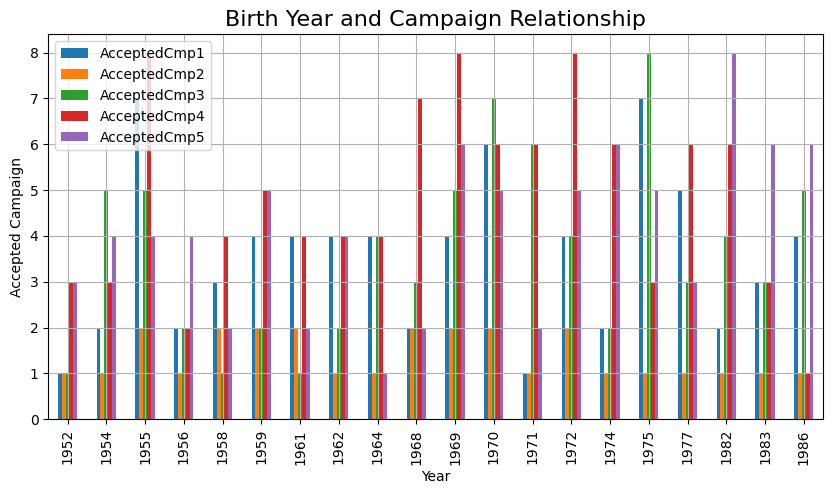

In [42]:
joined_data.plot(x="Year_Birth",
                                    y=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'],
                                        grid=0.8 ,kind="bar", figsize=(10, 5))
plt.title('Birth Year and Campaign Relationship', size=16)
plt.xlabel('Year')
plt.ylabel('Accepted Campaign')
plt.show()

In [43]:
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Year_Birth    20 non-null     int64
 1   AcceptedCmp1  20 non-null     int64
 2   AcceptedCmp2  20 non-null     int64
 3   AcceptedCmp3  20 non-null     int64
 4   AcceptedCmp4  20 non-null     int64
 5   AcceptedCmp5  20 non-null     int64
dtypes: int64(6)
memory usage: 1.1 KB


In [44]:
# year_campaign = ['Year', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
# year_data = Data[year_campaign]

grouped_year_campaign = {}

for i in range(1, 6):
    yc = ['Year', f'AcceptedCmp{i}']
    year_df = Data[yc]
    year_df2 = year_df[year_df[f'AcceptedCmp{i}'] == 1]
    grouped_year_data = year_df2.groupby('Year')[f'AcceptedCmp{i}'].sum().reset_index()
    grouped_year_campaign[f'grouped_year_data{i}'] = grouped_year_data

# grouped_year_campaign

joined_year_campaign_data = pd.merge(left = grouped_year_campaign['grouped_year_data1'], right = grouped_year_campaign['grouped_year_data2'],
                                left_on = 'Year',
                                right_on = 'Year')
for i in range(3, 6):
    joined_year_campaign_data = pd.merge(left = joined_year_campaign_data, right = grouped_year_campaign[f'grouped_year_data{i}'],
                                    left_on = 'Year',
                                    right_on = 'Year')
joined_year_campaign_data

,Year,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,12,24,7,37,44,32
1,13,78,15,80,79,86
2,14,42,8,46,44,45


In [45]:
joined_year_campaign_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,3.0,13.000000,1.000000,12.0,12.5,13.0,13.5,14.0
AcceptedCmp1,3.0,48.000000,27.495454,24.0,33.0,42.0,60.0,78.0
AcceptedCmp2,3.0,10.000000,4.358899,7.0,7.5,8.0,11.5,15.0
AcceptedCmp3,3.0,54.333333,22.678918,37.0,41.5,46.0,63.0,80.0
AcceptedCmp4,3.0,55.666667,20.207259,44.0,44.0,44.0,61.5,79.0
AcceptedCmp5,3.0,54.333333,28.183920,32.0,38.5,45.0,65.5,86.0


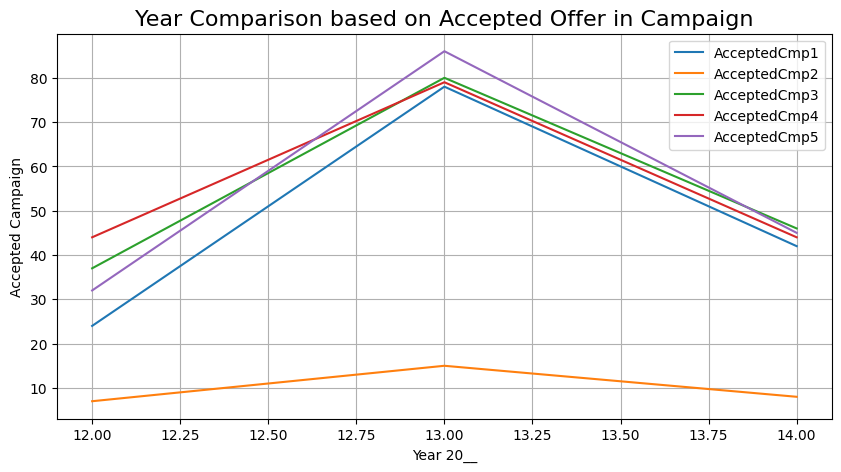

In [46]:
joined_year_campaign_data.plot(x="Year",
                                    y=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'],
                                        grid=0.8 ,kind="line", figsize=(10, 5))
plt.title('Year Comparison based on Accepted Offer in Campaign', size=16)
plt.xlabel('Year 20__')
plt.ylabel('Accepted Campaign')
plt.show()